## 7 - Random Walk

How do you know your time series problem is predictable ? This is difficult question with Time Series Forecasting. There is a tool called random walk that can help you understand the predictability of your TSF.

We will learn.

- What random Walk is and how to create one from scratch in Python.
- How to analyze the properties of a random walk and recognize when a TS is and is not a random walk.
- How to make predictions for a random walk.

### 7.1 Random Walk vs White Noise 

A random walk is different from a list of random numbers because the next value in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time step to the next. 

Simple model of a random walk is as follows:

- 1 Star with a random number of either -1 or 1.
- 2 Randomly select a -1 or 1 and add it to the observation from the prvious time step.
- 3 Repet step 2 fo as log as you like.

More succinctly, we can describe this process  as:  

    *y(t) = B0 + B1 × X(t − 1) + e(t)*

*y(t)* = next step in the series.  
*B0* = coefficient that if set to the value other than 0  
*B1* = coefficient to weight the previous time step  .
*X(t − 1)* = Is the obseration at the prvious time step.
*e(t)* = is the White noise.

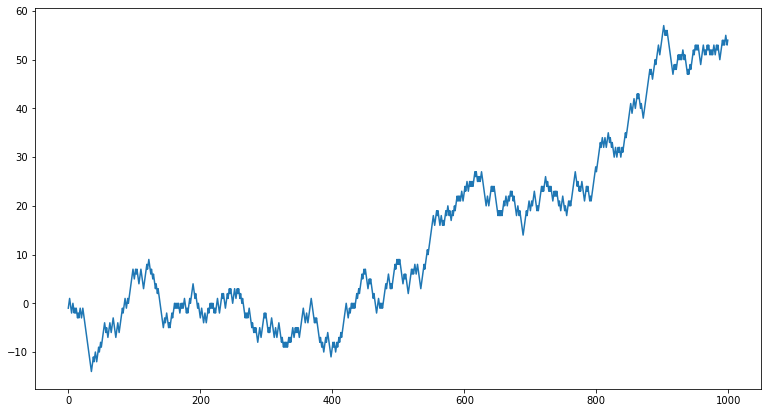

In [3]:
# create and plot a random walk
from random import seed
from random import random
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [13, 7]

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

### 7.2 Random Walk and Autocorrelation.

We can calculate the correlation between each observation and the observation at previous time steps. 
A plot that check the autocorrelation its called  "autocorrelation plot" or "correlogram".

A strong autocorrelation is expected in the Random walk due the way its constructed. We can use the autocorrelation_plot()

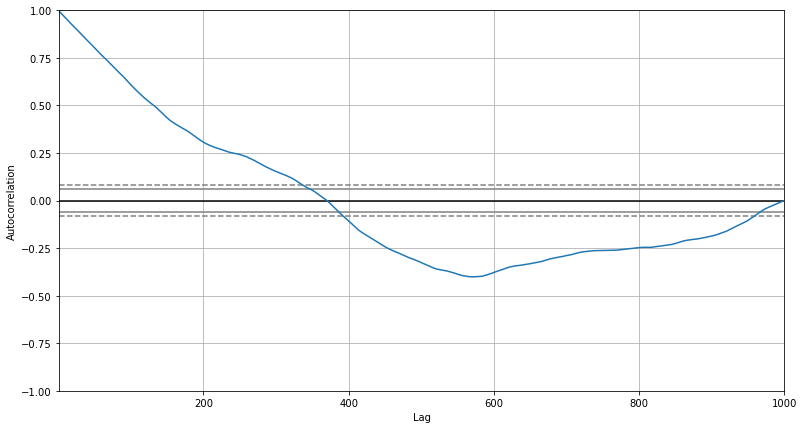

In [4]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(random_walk)
pyplot.show()

### 7.3 Stationary in the random Walk.

Stationary in TS is where teh values are not a function of time. We can expect a random wak to be **non-stationary**.
Non-stationary time series does not have a consistent mean or variance over time.

With Dickey-Fuller test we can confirm if is stationary or not.

**Fuller test:** Null Hypotesis of the test ist that TS is `non-stationary`

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
having p-values > 0.05 (in our case is 0.97) then the null hypotesis is true, so is non-stationary

In [ ]:
### 7.4 Predicting a Random Walk.

1) A Random Walk is unpredictable, it cannot reasonably be predicted

In [1]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot
import os
import pandas as pd

data = os.environ.get('data') # avoid personal information in the notebook
data_path = data + '\\01_TimeSeries\\1-daily-total-female-births.csv'
series = read_csv(data_path, header=0, index_col=0, parse_dates=True, squeeze=True)